<a href="https://colab.research.google.com/github/gabrielaaguiv5/ProyectoFinal2/blob/main/notebooks/01_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =========================================================
#  SmartChat Insight - 01_cleaning.ipynb
#  Limpieza y estructuración de archivos .txt exportados de WhatsApp
# =========================================================

# Importar librerías necesarias
import re
import pandas as pd
from pathlib import Path

# Definir ruta de entrada y salida
raw_path = Path("data/raw_chats/")
clean_path = Path("data/cleaned/")
clean_path.mkdir(parents=True, exist_ok=True)

# Función para leer y limpiar un archivo de chat
def parse_whatsapp_chat(file_path):
    """
    Convierte un archivo .txt exportado de WhatsApp en un DataFrame estructurado.
    Columnas: date, time, user, message
    """
    pattern = re.compile(r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[ap]\.?\s?m\.?) - (.*?): (.*)")
    data = []

    with open(file_path, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            match = pattern.match(line)
            if match:
                date, time, user, message = match.groups()
                data.append([date, time, user.strip(), message.strip()])

    df = pd.DataFrame(data, columns=["date", "time", "user", "message"])
    return df

# Procesar todos los archivos .txt en la carpeta data/raw_chats/
all_chats = []
for file in raw_path.glob("*.txt"):
    print(f"Procesando {file.name} ...")
    df_chat = parse_whatsapp_chat(file)
    df_chat["file_name"] = file.name
    all_chats.append(df_chat)

# Unir todos los chats en un solo DataFrame
df_all = pd.concat(all_chats, ignore_index=True)

# Eliminar mensajes del sistema (como “Los mensajes y las llamadas están cifrados...”)
df_all = df_all[~df_all["message"].str.contains("cifrados de extremo a extremo", na=False)]

# Normalizar nombres y fechas
df_all["date"] = pd.to_datetime(df_all["date"], dayfirst=True, errors="coerce")
df_all["time"] = df_all["time"].str.replace(" ", " ")  # limpiar espacios Unicode

# Guardar resultado limpio
output_file = clean_path / "whatsapp_clean.csv"
df_all.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"Archivo limpio guardado en: {output_file}")
print(f"Total de mensajes procesados: {len(df_all)}")

# Vista previa
df_all.head(10)


Procesando Chat de WhatsApp con +34 610 94 76 16.txt ...
✅ Archivo limpio guardado en: data/cleaned/whatsapp_clean.csv
Total de mensajes procesados: 19


/tmp/ipython-input-66273431.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all["date"] = pd.to_datetime(df_all["date"], dayfirst=True, errors="coerce")


,date,time,user,message,file_name
0,2025-10-22,9:07 a. m.,+34 610 94 76 16,Hola buenas tardes,Chat de WhatsApp con +34 610 94 76 16.txt
1,2025-10-22,9:07 a. m.,Vidrios Y Fachadas,"Bienvenido, conoce nuestra variedad de productos:",Chat de WhatsApp con +34 610 94 76 16.txt
2,2025-10-22,9:11 a. m.,+34 610 94 76 16,Mi nombre es Paula Andrea Mitev isaza,Chat de WhatsApp con +34 610 94 76 16.txt
3,2025-10-22,9:43 a. m.,Vidrios Y Fachadas,Muy buenos doas,Chat de WhatsApp con +34 610 94 76 16.txt
4,2025-10-22,9:43 a. m.,Vidrios Y Fachadas,Como esta?,Chat de WhatsApp con +34 610 94 76 16.txt
5,2025-10-22,9:48 a. m.,+34 610 94 76 16,Muy bien,Chat de WhatsApp con +34 610 94 76 16.txt
6,2025-10-22,9:48 a. m.,+34 610 94 76 16,Te hago una preguntita,Chat de WhatsApp con +34 610 94 76 16.txt
7,2025-10-22,9:49 a. m.,+34 610 94 76 16,"Es que perdí mi celular, y no sé si mandé hace...",Chat de WhatsApp con +34 610 94 76 16.txt
8,2025-10-22,10:26 a. m.,+34 610 94 76 16,?,Chat de WhatsApp con +34 610 94 76 16.txt
9,2025-10-22,10:30 a. m.,Vidrios Y Fachadas,Muy buenos dias,Chat de WhatsApp con +34 610 94 76 16.txt


In [3]:
# =========================================================
# SmartChat Insight - 02_analysis.ipynb
# Análisis de clientes recurrentes, perdidos y productos más solicitados
# =========================================================

# Importar librerías
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Definir rutas
clean_path = Path("data/cleaned/whatsapp_clean.csv")
output_path = Path("data/outputs/")
output_path.mkdir(parents=True, exist_ok=True)

# Cargar datos limpios
df = pd.read_csv(clean_path)
df["date"] = pd.to_datetime(df["date"], errors="coerce")

print("Datos cargados correctamente")
print(f"Total de mensajes: {len(df)}")
df.head(5)


✅ Datos cargados correctamente
Total de mensajes: 19


,date,time,user,message,file_name
0,2025-10-22,9:07 a. m.,+34 610 94 76 16,Hola buenas tardes,Chat de WhatsApp con +34 610 94 76 16.txt
1,2025-10-22,9:07 a. m.,Vidrios Y Fachadas,"Bienvenido, conoce nuestra variedad de productos:",Chat de WhatsApp con +34 610 94 76 16.txt
2,2025-10-22,9:11 a. m.,+34 610 94 76 16,Mi nombre es Paula Andrea Mitev isaza,Chat de WhatsApp con +34 610 94 76 16.txt
3,2025-10-22,9:43 a. m.,Vidrios Y Fachadas,Muy buenos doas,Chat de WhatsApp con +34 610 94 76 16.txt
4,2025-10-22,9:43 a. m.,Vidrios Y Fachadas,Como esta?,Chat de WhatsApp con +34 610 94 76 16.txt


In [4]:
# Identificar participantes únicos
clientes = df["user"].unique()
print(f"Total de usuarios detectados: {len(clientes)}")

# Calcular número de mensajes, primera y última fecha
activity = (
    df.groupby("user")
      .agg(
          mensajes=("message", "count"),
          primer_contacto=("date", "min"),
          ultimo_contacto=("date", "max")
      )
      .reset_index()
)

# Calcular días desde el último mensaje
activity["dias_desde_ultimo"] = (df["date"].max() - activity["ultimo_contacto"]).dt.days

# Clasificar clientes
def clasificar_cliente(dias):
    if dias <= 15:
        return "Frecuente"
    elif dias <= 45:
        return "Inactivo reciente"
    else:
        return "Perdido"

activity["estado"] = activity["dias_desde_ultimo"].apply(clasificar_cliente)

activity.head(10)


Total de usuarios detectados: 2


,user,mensajes,primer_contacto,ultimo_contacto,dias_desde_ultimo,estado
0,+34 610 94 76 16,9,2025-10-22,2025-10-22,0,Frecuente
1,Vidrios Y Fachadas,10,2025-10-22,2025-10-22,0,Frecuente


In [5]:
# Palabras clave de productos (puedes adaptarlas según tu negocio)
productos = [
    "vidrio", "fachada", "aluminio", "puerta", "ventana",
    "baño", "división", "pasamanos", "pérgola", "instalador"
]

# Contar menciones de cada producto
conteo_productos = {}
for p in productos:
    conteo_productos[p] = df["message"].str.contains(p, case=False, na=False).sum()

df_productos = pd.DataFrame(list(conteo_productos.items()), columns=["producto", "menciones"])
df_productos = df_productos.sort_values(by="menciones", ascending=False)
df_productos


,producto,menciones
9,instalador,1
5,baño,1
1,fachada,0
0,vidrio,0
3,puerta,0
2,aluminio,0
4,ventana,0
6,división,0
7,pasamanos,0
8,pérgola,0


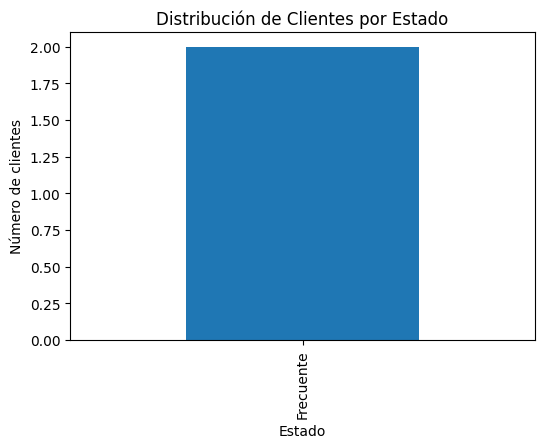

<Figure size 800x400 with 0 Axes>

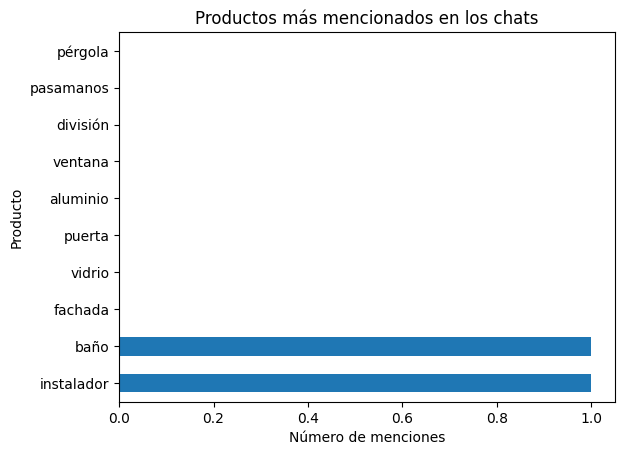

In [6]:
# Gráfico de clientes según estado
plt.figure(figsize=(6,4))
activity["estado"].value_counts().plot(kind="bar")
plt.title("Distribución de Clientes por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de clientes")
plt.show()

# Gráfico de productos más mencionados
plt.figure(figsize=(8,4))
df_productos.plot(kind="barh", x="producto", y="menciones", legend=False)
plt.title("Productos más mencionados en los chats")
plt.xlabel("Número de menciones")
plt.ylabel("Producto")
plt.show()


In [7]:
activity.to_csv(output_path / "clientes.csv", index=False, encoding="utf-8-sig")
df_productos.to_csv(output_path / "productos.csv", index=False, encoding="utf-8-sig")

print("✅ Archivos exportados para Power BI:")
print(f"- {output_path / 'clientes.csv'}")
print(f"- {output_path / 'productos.csv'}")


✅ Archivos exportados para Power BI:
- data/outputs/clientes.csv
- data/outputs/productos.csv


In [8]:
# =========================================================
# SmartChat Insight - 03_export_powerbi.ipynb
# Exportación y preparación de datasets finales para Power BI
# =========================================================

# Importar librerías
import pandas as pd
from pathlib import Path

# Rutas de entrada y salida
input_path = Path("data/outputs/")
final_path = Path("data/outputs/final/")
final_path.mkdir(parents=True, exist_ok=True)

# Cargar archivos de análisis previos
clientes = pd.read_csv(input_path / "clientes.csv")
productos = pd.read_csv(input_path / "productos.csv")

print(f"Clientes cargados: {len(clientes)} registros")
print(f"Productos cargados: {len(productos)} registros")

clientes.head(5)


Clientes cargados: 2 registros
Productos cargados: 10 registros


,user,mensajes,primer_contacto,ultimo_contacto,dias_desde_ultimo,estado
0,+34 610 94 76 16,9,2025-10-22,2025-10-22,0,Frecuente
1,Vidrios Y Fachadas,10,2025-10-22,2025-10-22,0,Frecuente


In [9]:
# Normalizar nombres de columnas a formato uniforme para Power BI
clientes.columns = clientes.columns.str.lower().str.replace(" ", "_")
productos.columns = productos.columns.str.lower().str.replace(" ", "_")

# Asegurar tipos de datos correctos
clientes["primer_contacto"] = pd.to_datetime(clientes["primer_contacto"], errors="coerce")
clientes["ultimo_contacto"] = pd.to_datetime(clientes["ultimo_contacto"], errors="coerce")
clientes["dias_desde_ultimo"] = clientes["dias_desde_ultimo"].astype(int)


In [10]:
# Crear un resumen con totales por estado
resumen_clientes = (
    clientes.groupby("estado")
    .agg(
        total_clientes=("user", "count"),
        promedio_mensajes=("mensajes", "mean"),
        dias_promedio_inactividad=("dias_desde_ultimo", "mean")
    )
    .reset_index()
)

# Agregar fecha de generación del reporte
from datetime import datetime
resumen_clientes["fecha_reporte"] = datetime.now().strftime("%Y-%m-%d")
resumen_clientes


,estado,total_clientes,promedio_mensajes,dias_promedio_inactividad,fecha_reporte
0,Frecuente,2,9.5,0.0,2025-10-27


In [11]:
clientes.to_csv(final_path / "clientes_powerbi.csv", index=False, encoding="utf-8-sig")
productos.to_csv(final_path / "productos_powerbi.csv", index=False, encoding="utf-8-sig")
resumen_clientes.to_csv(final_path / "resumen_clientes.csv", index=False, encoding="utf-8-sig")

print("Archivos finales generados:")
for file in final_path.glob("*.csv"):
    print("-", file.name)


Archivos finales generados:
- resumen_clientes.csv
- clientes_powerbi.csv
- productos_powerbi.csv
